In [1]:
import os
import matplotlib.pyplot as plt
import collections


import numpy as np
import pandas as pd

In [2]:
KMNIST_DIR = "kmnist"

kmnist_files = sorted([os.path.join(KMNIST_DIR, filename) for filename in os.listdir(KMNIST_DIR) 
                       if filename.endswith("npz")])
kmnist_files

['kmnist/k49-test-imgs.npz',
 'kmnist/k49-test-labels.npz',
 'kmnist/k49-train-imgs.npz',
 'kmnist/k49-train-labels.npz']

In [3]:
def load(f):
    return np.load(f)['arr_0']

# Load the data
x_test = load(kmnist_files[0])
y_test = load(kmnist_files[1])
x_train = load(kmnist_files[2])
y_train = load(kmnist_files[3])


In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((232365, 28, 28), (38547, 28, 28), (232365,), (38547,))

In [5]:
y_train[:5]

array([30, 19, 20, 30,  7], dtype=uint8)

In [6]:
kmnist_labelmap_file = sorted([os.path.join(KMNIST_DIR, filename) 
                               for filename in os.listdir(KMNIST_DIR) if filename.endswith("csv")])
df_map = pd.read_csv(kmnist_labelmap_file[0])
df_map

,index,codepoint,char
0,0,U+3042,あ
1,1,U+3044,い
2,2,U+3046,う
3,3,U+3048,え
4,4,U+304A,お
5,5,U+304B,か
6,6,U+304D,き
7,7,U+304F,く
8,8,U+3051,け
9,9,U+3053,こ


In [7]:
labels = df_map["char"].tolist()

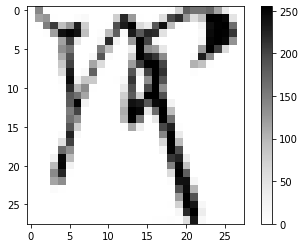

In [8]:
plt.figure()
plt.imshow(x_train[12], cmap='Greys')
plt.colorbar()
# plt.grid(False)
plt.show()

In [9]:
import matplotlib as mpl
import matplotlib.font_manager as fm

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

print ('설정파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

버전:  3.1.1
설치 위치:  /home/sc82choi/miniconda3/envs/dsme/lib/python3.6/site-packages/matplotlib/__init__.py
설정 위치:  /home/sc82choi/.config/matplotlib
캐시 위치:  /home/sc82choi/.cache/matplotlib
설정파일 위치:  /home/sc82choi/miniconda3/envs/dsme/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
265


In [10]:
plt.style.use('ggplot')
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams

# フォントパスを指定 .ttf 形式でないと駄目な模様, 関連：https://github.com/matplotlib/matplotlib/pull/3912
font_path = '/home/sc82choi/.local/share/fonts/Osaka.ttc'
fp = FontProperties(fname=font_path, size=14)

# get_name() で 'Osaka' が返ってきています。メソッドの代わりに = 'Osaka' としてもOK
rcParams['font.family'] = fp.get_name()

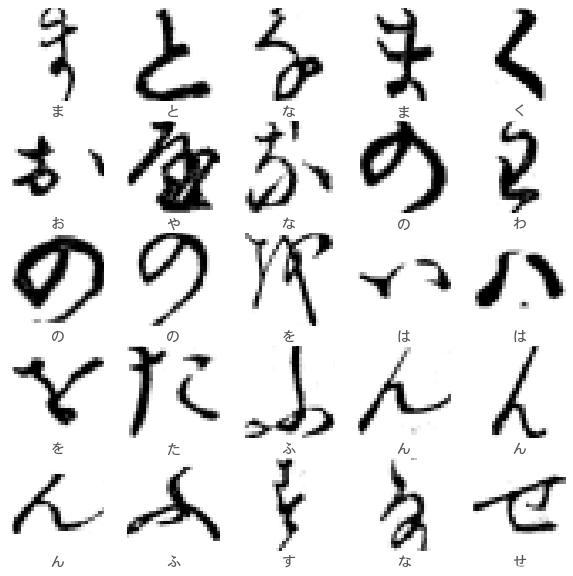

In [11]:



plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]],  fontproperties=fp)
plt.show()

In [12]:
import tensorflow as tf

In [13]:
## Hyper parameters
batch_size = 2048

In [14]:
def prepare_features_and_labels(x, y):
    x = tf.cast(x, tf.float64) / 255.0
    x = tf.expand_dims(x, 2)
    y = tf.cast(y, tf.int8)
    return x, y

# df image_augmentation(x,y):    
#     brght_img = tf.reverse(tf_img, axis =[0]) #Verticle flipping
#     brght_img = tf.reverse(tf_img, axis =[1]) 
#     return

def mnist_train_dataset(images_npy, labels_npy, batch_size):
    ds = tf.data.Dataset.from_tensor_slices((images_npy, labels_npy))
    ds = ds.map(prepare_features_and_labels, num_parallel_calls=4 )
    ds = ds.shuffle(10000).repeat().batch(batch_size)
    return ds


def mnist_test_dataset(images_npy, labels_npy, batch_size=None):
    ds = tf.data.Dataset.from_tensor_slices((images_npy, labels_npy))
    ds = ds.map(prepare_features_and_labels)
    if batch_size is not None:
        ds = ds.shuffle(10000).repeat().batch(batch_size)
    else:
        ds = ds.repeat().batch(len(labels_npy))
    return ds

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=0)
train_index, dev_index = next(sss.split(x_train, y_train))

train_index.shape, dev_index.shape

((197510,), (34855,))

In [16]:
from tensorflow.keras.utils import to_categorical
train_dataset = mnist_train_dataset(x_train[train_index], y_train[train_index], batch_size)
val_dataset = mnist_test_dataset(x_train[dev_index], y_train[dev_index])
test_dataset = mnist_test_dataset(x_test,y_test)

In [17]:


for row in val_dataset.take(5):
    print(collections.Counter(row[1].numpy().tolist()))

Counter({18: 900, 40: 900, 19: 900, 35: 900, 24: 900, 30: 900, 7: 900, 38: 900, 17: 900, 20: 900, 12: 900, 2: 900, 11: 900, 27: 900, 5: 900, 47: 900, 10: 900, 15: 900, 34: 900, 21: 900, 9: 900, 25: 900, 37: 900, 6: 900, 41: 900, 4: 900, 0: 900, 39: 900, 1: 900, 28: 900, 46: 900, 26: 770, 8: 707, 13: 625, 14: 580, 48: 528, 33: 509, 31: 459, 16: 385, 23: 368, 43: 360, 42: 321, 22: 309, 29: 299, 32: 258, 36: 240, 3: 116, 44: 62, 45: 59})
Counter({18: 900, 40: 900, 19: 900, 35: 900, 24: 900, 30: 900, 7: 900, 38: 900, 17: 900, 20: 900, 12: 900, 2: 900, 11: 900, 27: 900, 5: 900, 47: 900, 10: 900, 15: 900, 34: 900, 21: 900, 9: 900, 25: 900, 37: 900, 6: 900, 41: 900, 4: 900, 0: 900, 39: 900, 1: 900, 28: 900, 46: 900, 26: 770, 8: 707, 13: 625, 14: 580, 48: 528, 33: 509, 31: 459, 16: 385, 23: 368, 43: 360, 42: 321, 22: 309, 29: 299, 32: 258, 36: 240, 3: 116, 44: 62, 45: 59})
Counter({18: 900, 40: 900, 19: 900, 35: 900, 24: 900, 30: 900, 7: 900, 38: 900, 17: 900, 20: 900, 12: 900, 2: 900, 11: 900

In [18]:
train_size = len(x_train[train_index])
# train_size = len(y_resampled)
val_size = len(x_train[dev_index])
test_size = len(x_test)

train_size, val_size, test_size

(197510, 34855, 38547)

In [19]:
## Hyper parameters
learning_rate = 0.01
beta_1 = 0.9
beta_2 = 0.99
epsilon = 0.00001
epochs = 500
# optimizer = tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.0, decay=0.001, nesterov=False)

In [36]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [37]:
from tensorflow.keras import models, layers

class LeNet(models.Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()
        self.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='linear', 
                               input_shape=input_shape, padding="same"))
        self.add(layers.BatchNormalization())
        self.add(layers.ReLU())   # add an advanced activation
        self.add(layers.Dropout(0.5))
        
        self.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
        self.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='linear', padding='valid'))
        self.add(layers.BatchNormalization())
        self.add(layers.ReLU())   # add an advanced activation
        self.add(layers.Dropout(0.5))

        self.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='linear', padding='valid'))
        self.add(layers.BatchNormalization())
        self.add(layers.ReLU())   # add an advanced activation
        self.add(layers.Dropout(0.5))

        self.add(layers.Flatten())
        self.add(layers.Dense(84, activation='linear'))        
        self.add(layers.BatchNormalization())
        self.add(layers.ReLU())   # add an advanced activation
        self.add(layers.Dense(nb_classes, activation='softmax'))

In [38]:
model = LeNet(tf.expand_dims(x_train[0],2).shape, 49)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1, beta_2, epsilon)
# optimizer = tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.0, decay=0.001, nesterov=False)

In [39]:
model.summary()

Model: "le_net_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 6)         24        
_________________________________________________________________
re_lu_4 (ReLU)               (None, 28, 28, 6)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
batch_normalization_5 (Batch (None, 23, 23, 16)        64 

In [40]:
model.compile(optimizer=optimizer,
              loss=loss_object,
              metrics=['accuracy'])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True, monitor="val_loss")

In [42]:
hist = model.fit(train_dataset, epochs=epochs, steps_per_epoch=train_size // batch_size,
          validation_data=val_dataset, validation_steps=1,
                callbacks=[early_stopping])

Train for 96 steps, validate for 1 steps
Epoch 1/500
 1/96 [..............................] - ETA: 1:30WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: 


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node le_net_1/conv2d_3/Conv2D (defined at /home/sc82choi/miniconda3/envs/dsme/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:1751) ]] [Op:__inference_distributed_function_4766]

Function call stack:
distributed_function


In [ ]:
score = model.evaluate(test_dataset, steps=1)

In [ ]:
predictions = model.predict(x_test.reshape(-1,28,28,1) / 255.)